<h1>Skew Symmetry</h1>

Two-dimensional symmetries when observed in a three dimensional enviroment are often skewed, meaning a distorted version of the symmetry has is percepted by the receptor because of the visual angle. The dataset needs to be able to create skewed elements to generalize better for more natural images.

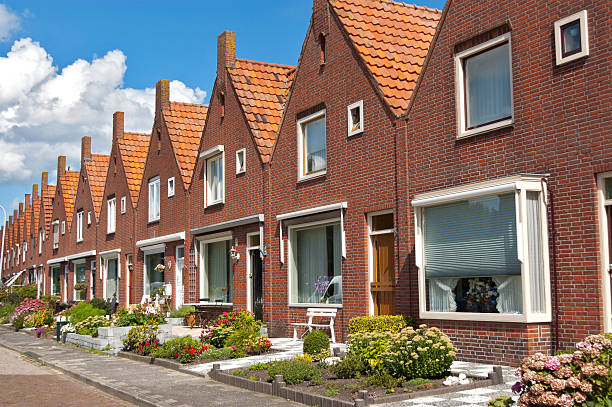

In [11]:
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Utils.functions import *

<h3>First steps</h3>

First a random symmetry is created

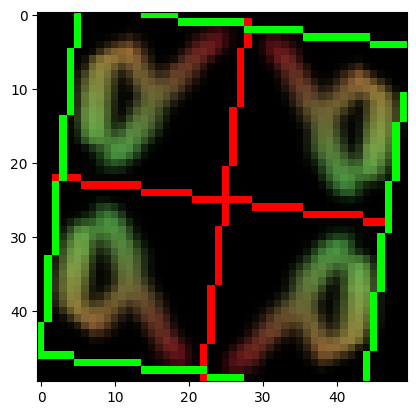

In [2]:
# Reading the database
mnist = pd.read_csv('MNIST/mnist_test.csv')

img, dict = createAnySymmetry(random.randint(0,10000), mnist, ['simple', 'cross'], [0.5, 0.5])

display = img.copy()
drawMultipleSAandBB(display, dict['symAxes'], dict['center'], dict['width'], dict['height'], dict['finalRotation'])

plt.imshow(display)
plt.show()

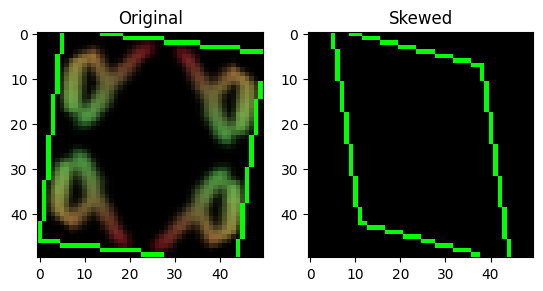

In [3]:
w, h, cx, cy = dict['width'], dict['height'], dict['center'][0], dict['center'][1]

input_pts = np.float32([
    [cx-w/2, cy-h/2],
    [cx+w/2, cy-h/2],
    [cx+w/2, cy+h/2],
    [cx-w/2, cy+h/2]
])

# Rotating
rotationMatrix = cv2.getRotationMatrix2D(dict['center'], dict['finalRotation'], 1)
rotated_input =  np.float32(transformKeypoints(input_pts, rotationMatrix))

skewPercX = 0.2
skewPercY = 0.5

output_pts = np.float32([
    [(input_pts[0][0] + (w/2)*skewPercX), (input_pts[0][1] + (h/2)*skewPercY)],
    input_pts[1],
    [(input_pts[2][0] - (w/2)*skewPercX), (input_pts[2][1] - (h/2)*skewPercY)],
    input_pts[3]
])
# Rotating
rotationMatrix = cv2.getRotationMatrix2D(dict['center'], dict['finalRotation'], 1)
output_pts =  np.float32(transformKeypoints(output_pts, rotationMatrix))

skewed = np.zeros(img.shape).astype(np.uint8)

display = img.copy()
displayBoundingBox(display, rotated_input)
displayBoundingBox(skewed, output_pts)

fig, ax = plt.subplots(1,2)
ax[0].imshow(display), ax[0].set_title(f'Original')
ax[1].imshow(skewed), ax[1].set_title('Skewed')
plt.show()

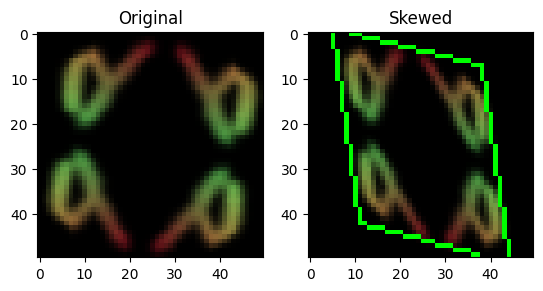

In [8]:
M = cv2.getPerspectiveTransform(rotated_input, output_pts)
out = cv2.warpPerspective(src=img,M=M,dsize=(img.shape[1], img.shape[0]),flags=cv2.INTER_LINEAR)
displayOut = out.copy()
displayBoundingBox(displayOut, output_pts)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img), ax[0].set_title(f'Original')
ax[1].imshow(displayOut), ax[1].set_title('Skewed')
plt.show()

In [24]:
points = []
for symAxis in dict['symAxes']:
    points.append(symAxis[0])
    points.append(symAxis[1])

skewed = transformKeypoints(points, M)

skewedSymAxis = []
for i in range(len(skewed)//2):
    skewedSymAxis.append([skewed[i*2],skewed[i*2+1]])

displayOut = out.copy()
drawMultipleSAandBB(displayOut, skewedSymAxis, dict['center'], dict['width'], dict['height'])

[[[47.898701554450035, 28.056214944695654], [2.6385970396057443, 22.498972885420944]], [[28.19351353875142, 1.4564862756665704], [22.343785055304355, 49.09870155445004]]]
[[(41.94870655519004, 29.743673634273605), (8.588598071015205, 20.81152053087849)], [(22.243515646518354, 3.1439417629787356), (28.29378897968689, 47.411252402173375)]]


<h3>Putting Everything Together</h3>

Include all code into a single function.

In [5]:
def skewImage(src: np.ndarray, width: int, height: int, center) -> np.ndarray:
    w,h,cx,cy = width, height, center
    